In [21]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [22]:
G = nx.DiGraph()

In [26]:
df = pd.read_csv("clean_tweets_v2.csv")

In [27]:
retweets = {}
listed_count = {}

In [28]:
for row in df.iterrows():
#     li.append(re.sub("[@:.]", "", row[1][1]))
#     li.append(row[1][0])
    if row[1][3] == "RT":
        if row[1][4] in retweets.keys():
            retweets[row[1][4]] += 1
        else:
            retweets[row[1][4]] = 1
    if row[1][1] in listed_count.keys():
        listed_count[row[1][1]] += 1
    else:
        listed_count[row[1][1]] = 1
    G.add_edge(row[1][1], row[1][4])

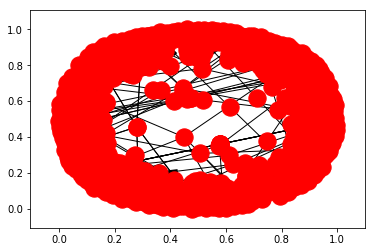

In [29]:
nx.draw_networkx(G, with_labels = False)
plt.savefig("images/Graph.png", format="PNG")

As you can see above, there are only a few people in the middle that connect otherwise wildy disconnected people. However, these are <b><i> all </i></b> terminal connections. As you'll see in the dataframe shortly, this will cause the betweeness of everynode to be 0.

In [36]:
net_df = pd.DataFrame({"degree":G.degree(), "betweenness":nx.betweenness_centrality(G, normalized=False), \
                       "closeness":nx.closeness_centrality(G), "retweets":retweets})

In [37]:
net_df["scaled_degree"] = net_df["degree"]/G.number_of_nodes()

In [56]:
net_df = net_df.fillna(0)
net_df.reset_index(inplace=True)

In [57]:
net_df

,index,betweenness,closeness,degree,retweets,scaled_degree
0,1037ChuckFM,0.0,0.000000,2,0.0,0.002041
1,1127AM_,0.0,0.001021,1,0.0,0.001020
2,11Yumitsu11,0.0,0.001021,1,0.0,0.001020
3,13OYSL,0.0,0.000000,2,0.0,0.002041
4,14sakura214,0.0,0.001021,1,0.0,0.001020
5,17mamabts4,0.0,0.002043,2,0.0,0.002041
6,18dMedia,0.0,0.000000,2,0.0,0.002041
7,1StevieKilner,0.0,0.001021,1,0.0,0.001020
8,1_newsnet,0.0,0.000000,2,0.0,0.002041
9,23238ffm,0.0,0.001021,1,0.0,0.001020


In [42]:
listed_cnt = pd.read_csv("raw_tweets.csv")
listed_cnt2 = listed_cnt[['screen_name','listed_count']]
listed_cnt2.head()

,screen_name,listed_count
0,soompi,5448
1,joshrogin,3439
2,SBNation,5243
3,BishopIkedi1,57
4,RoDCelaya,6


In [110]:
net_df2 = net_df.merge(listed_cnt2,left_on='index',right_on='screen_name',how='left')
net_df2.drop(['screen_name'],axis=1,inplace=True)
net_df2.drop_duplicates(subset='index',keep='first',inplace=True)
net_df2.fillna(0,inplace=True)
net_df2

,index,betweenness,closeness,degree,retweets,scaled_degree,listed_count
0,1037ChuckFM,0.0,0.000000,2,0.0,0.002041,13.0
1,1127AM_,0.0,0.001021,1,0.0,0.001020,0.0
8,11Yumitsu11,0.0,0.001021,1,0.0,0.001020,0.0
16,13OYSL,0.0,0.000000,2,0.0,0.002041,15.0
23,14sakura214,0.0,0.001021,1,0.0,0.001020,10.0
29,17mamabts4,0.0,0.002043,2,0.0,0.002041,0.0
36,18dMedia,0.0,0.000000,2,0.0,0.002041,39.0
44,1StevieKilner,0.0,0.001021,1,0.0,0.001020,68.0
48,1_newsnet,0.0,0.000000,2,0.0,0.002041,56.0
49,23238ffm,0.0,0.001021,1,0.0,0.001020,9.0


In [111]:
net_df2["score"] = (net_df2["listed_count"]-net_df2["listed_count"].mean())/net_df2["listed_count"].std() + \
(net_df2["closeness"] - net_df2["closeness"].mean())/net_df2["closeness"].std() + \
(net_df2["retweets"] - net_df2["retweets"].mean())/net_df2["retweets"].std() + \
(net_df2["scaled_degree"] - net_df2["scaled_degree"].mean())/net_df2["scaled_degree"].std() 

In [112]:
net_df2.set_index('index',inplace=True)

Below are our top 50 influencers

In [113]:
net_df2["score"].sort_values(ascending = False)[:50]

index
nytimes                        58.813942
minmeraki                      37.110422
SBNation                       19.520780
pyeongchang2018                15.784062
NFLRT                          12.984045
barry2tone                      9.930203
KoreanUpdates                   9.296205
hewitt_riri                     8.631142
Fenella_Wicks                   8.629709
ARMYIndonesiaa                  7.415406
3axel_2toe_tano                 6.588055
pamdon18                        6.588055
baobobaek                       6.023246
NBCNightlyNews                  5.660827
Essence                         5.312021
FabienMalbet                    4.946924
CBGworld                        4.927174
newsmax                         4.334743
ncsulilwolf                     4.253925
PBS                             4.231183
TIME                            3.935662
helenenothelen                  3.513486
94_degrees                      3.445712
weareoneEXO                     3.445712
Olympics  

In [109]:
net_df2

,betweenness,closeness,degree,retweets,scaled_degree,listed_count,score
index,,,,,,,
1037ChuckFM,0.0,0.000000,2,0.0,0.002041,13.0,-1.033731
1127AM_,0.0,0.001021,1,0.0,0.001020,0.0,-0.104677
11Yumitsu11,0.0,0.001021,1,0.0,0.001020,0.0,-0.104677
13OYSL,0.0,0.000000,2,0.0,0.002041,15.0,-1.033451
14sakura214,0.0,0.001021,1,0.0,0.001020,10.0,-0.103280
17mamabts4,0.0,0.002043,2,0.0,0.002041,0.0,1.566397
18dMedia,0.0,0.000000,2,0.0,0.002041,39.0,-1.030097
1StevieKilner,0.0,0.001021,1,0.0,0.001020,68.0,-0.095174
1_newsnet,0.0,0.000000,2,0.0,0.002041,56.0,-1.027721


In [114]:
net_df2.to_csv("network_calcs.csv")